In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Upload data

In [2]:
data = pd.read_csv('vehicles.csv')

In [3]:
data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [5]:
data = data.drop(['county'], axis=1)

<Axes: >

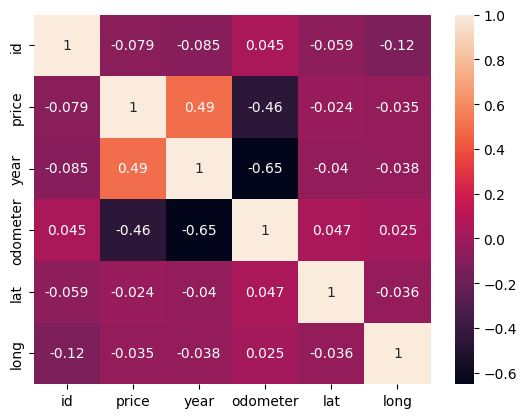

In [6]:
sns.heatmap(data.select_dtypes(include=[np.number]).corr(method='spearman'), annot=True)

**Here I realized that there are too many non-numeric values in the data. I have to change that**

### Data Preprocessing

In [7]:
pp_data = data.dropna()

In [8]:
pp_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34785 entries, 126 to 426836
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            34785 non-null  int64  
 1   url           34785 non-null  object 
 2   region        34785 non-null  object 
 3   region_url    34785 non-null  object 
 4   price         34785 non-null  int64  
 5   year          34785 non-null  float64
 6   manufacturer  34785 non-null  object 
 7   model         34785 non-null  object 
 8   condition     34785 non-null  object 
 9   cylinders     34785 non-null  object 
 10  fuel          34785 non-null  object 
 11  odometer      34785 non-null  float64
 12  title_status  34785 non-null  object 
 13  transmission  34785 non-null  object 
 14  VIN           34785 non-null  object 
 15  drive         34785 non-null  object 
 16  size          34785 non-null  object 
 17  type          34785 non-null  object 
 18  paint_color   34785 non-null

**I'm not sure if it is a good idea to drop lat and long, but I already have state and I think it makes more sense to move on with the sate alone. Also dropping the columns that I believe and then dropping the na values increase the number of non-nulls.**

In [9]:
pp_data = data.drop(['id','url','region_url','VIN','image_url','description','posting_date','region'], axis=1) # ,'lat','long'

In [10]:
pp_data = pp_data.dropna()

In [11]:
pp_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79016 entries, 31 to 426836
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         79016 non-null  int64  
 1   year          79016 non-null  float64
 2   manufacturer  79016 non-null  object 
 3   model         79016 non-null  object 
 4   condition     79016 non-null  object 
 5   cylinders     79016 non-null  object 
 6   fuel          79016 non-null  object 
 7   odometer      79016 non-null  float64
 8   title_status  79016 non-null  object 
 9   transmission  79016 non-null  object 
 10  drive         79016 non-null  object 
 11  size          79016 non-null  object 
 12  type          79016 non-null  object 
 13  paint_color   79016 non-null  object 
 14  state         79016 non-null  object 
 15  lat           79016 non-null  float64
 16  long          79016 non-null  float64
dtypes: float64(4), int64(1), object(12)
memory usage: 10.9+ MB


In [12]:
pp_data['type'].value_counts()

type
sedan          21774
SUV            20208
truck          13548
pickup          6588
coupe           4328
hatchback       3139
van             2736
convertible     2226
mini-van        1854
wagon           1697
other            480
offroad          333
bus              105
Name: count, dtype: int64

**There are too many unique models, here's the options I can follow**
- Drop models
- Select top 5 or 10 models and classify the others as 'others'

**Create different data for different features, (probably not all of them because some of them are required in all of the data i.e. transmission). Test all of them to see the corrolations.**

In [13]:
pp_data.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
31,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al,32.592000,-85.51890
55,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,al,32.547500,-85.46820
59,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,al,32.628739,-85.46182
65,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,al,32.630400,-85.40160
73,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey,al,32.822400,-85.77040


**Changing cylinders into int**

In [14]:
pp_data['cylinders'] = pp_data['cylinders'].str.extract('(\d+)').astype(float).astype('Int64')

In [15]:
pp_data['cylinders'].value_counts()

cylinders
6     27054
4     26030
8     23983
10      792
5       721
3       144
12       43
Name: count, dtype: Int64

In [16]:
pp_data.dropna(inplace= True)

<Axes: >

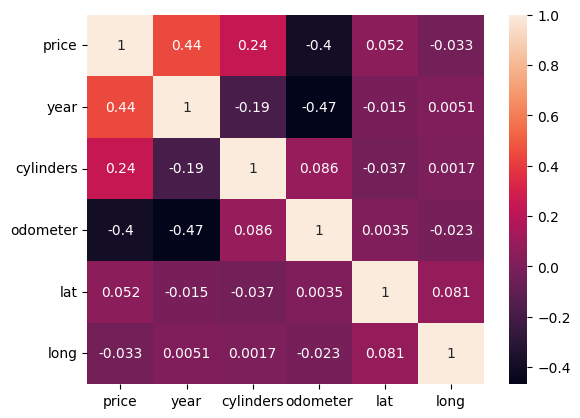

In [17]:
sns.heatmap(pp_data.select_dtypes(include=[np.number]).corr(method='spearman'), annot=True)

**Selecting features to create dummy variables to see the correlation**

In [18]:
pp_data.condition.value_counts()
# 6 different value

condition
excellent    39290
good         25213
like new     10536
fair          2986
new            504
salvage        238
Name: count, dtype: int64

In [19]:
pp_data.drive.value_counts()

drive
4wd    33278
fwd    28075
rwd    17414
Name: count, dtype: int64

In [20]:
#pp_data['transmission'] = pp_data['transmission'].replace('other', 'other transmissions')
pp_data.transmission.value_counts()

transmission
automatic    72166
manual        5767
other          834
Name: count, dtype: int64

In [21]:
pp_data = pp_data.join(pd.get_dummies(pp_data.transmission).astype(int)).drop(['transmission'], axis=1)

<Axes: >

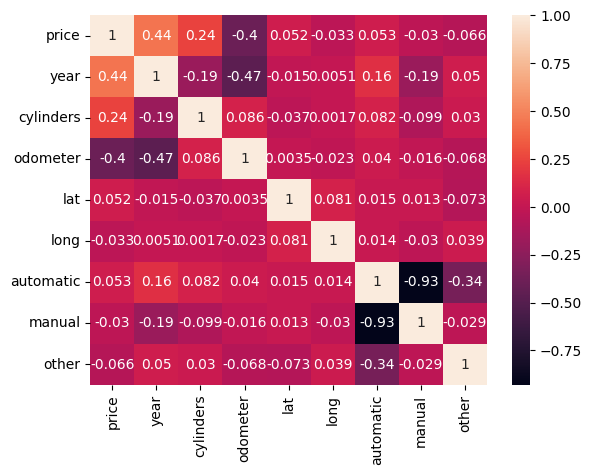

In [22]:
sns.heatmap(pp_data.select_dtypes(include=[np.number]).corr(method='spearman'), annot=True)

In [23]:
pp_data = pp_data.join(pd.get_dummies(pp_data.drive).astype(int)).drop(['drive'], axis=1)

<Axes: >

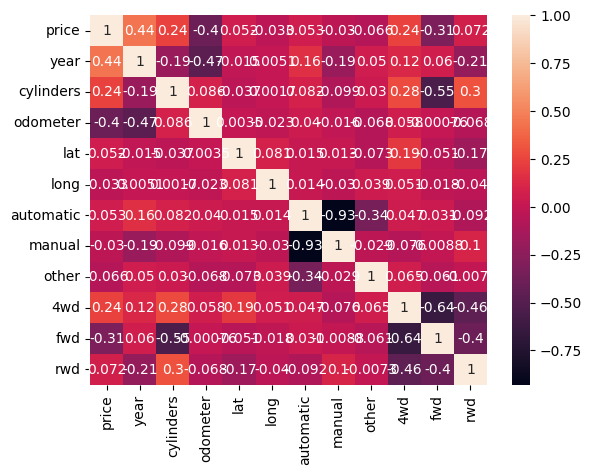

In [24]:
sns.heatmap(pp_data.select_dtypes(include=[np.number]).corr(method='spearman'), annot=True)

In [25]:
pp_data.price.value_counts()

price
0        3416
4500      993
3500      983
6500      931
5500      866
         ... 
2935        1
59998       1
16285       1
13135       1
27294       1
Name: count, Length: 4227, dtype: int64

In [26]:
pp_data.columns.values

array(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'size', 'type', 'paint_color',
       'state', 'lat', 'long', 'automatic', 'manual', 'other', '4wd',
       'fwd', 'rwd'], dtype=object)

<Axes: >

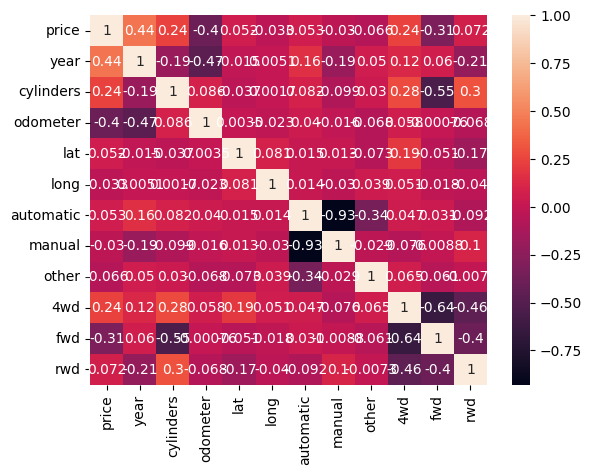

In [27]:
sns.heatmap(pp_data.select_dtypes(include=[np.number]).corr(method='spearman'), annot=True)

## First Model

**Initially I was dropping lat/long in the begging for pp_data, but wanted to test the results with them included on the 3rd model so I am dropping them here instead**

In [28]:
lrm_data = pp_data.select_dtypes(include=[np.number])
lrm_data = lrm_data.drop(['lat', 'long'], axis = 1)
lrm_data = lrm_data[lrm_data['price'] != 0]
lrm_data = lrm_data[lrm_data['price'] < 500000]
lrm_data = lrm_data[lrm_data['odometer'] < 3000000]

**Remove some extreme outliers**
- Cars over the price of 500k\$
- Cars with the price of 0\$
- Cars with over 3M odometers

In [29]:
X = lrm_data.drop(['price'], axis=1)
y = lrm_data['price']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor()

In [32]:
reg.score(X_test, y_test)

0.7318744777280481

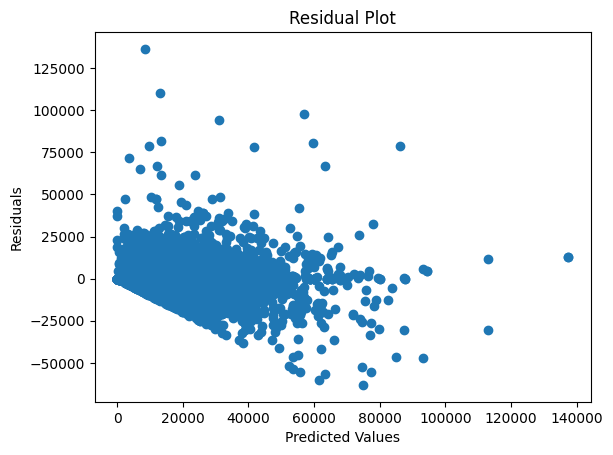

In [33]:
import matplotlib.pyplot as plt

y_pred = reg.predict(X_test)
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Secod Model

In [34]:
lrm_data['condition'] = pp_data['condition']

condition_mapping = {
    'salvage': 0,
    'fair': 1,
    'good': 2,
    'excellent': 3,
    'like new': 4,
    'new': 5
}


lrm_data['condition'] = lrm_data['condition'].map(condition_mapping)

<Axes: >

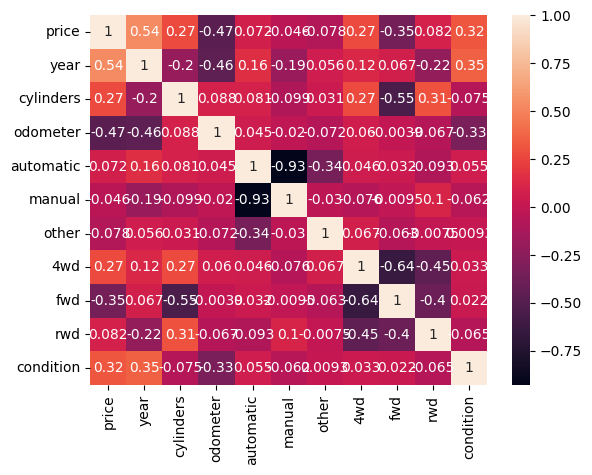

In [35]:
sns.heatmap(lrm_data.corr(method='spearman'), annot=True)

In [36]:
X = lrm_data.drop(['price'], axis=1)
y = lrm_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor()

In [38]:
reg.score(X_test, y_test)

0.748850498567901

**A not bad increase with the addition of condition**

## 3rd

In [39]:
lrm_data['lat'] = pp_data['lat']
lrm_data['long'] = pp_data['long']
X = lrm_data.drop(['price'], axis=1)
y = lrm_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor()

In [41]:
reg.score(X_test, y_test)

0.783690252783851

**Markable difference with lat and long**

## Random Forest Classifier

In [42]:
# from sklearn.ensemble import RandomForestClassifier

# clf = RandomForestClassifier(criterion='gini',
#                             max_depth = 8,
#                             min_samples_split = 10,
#                             random_state = 5)

In [43]:
# clf.fit(X_train, y_train)

In [44]:
# clf.feature_importances_

In [45]:
# X_train.columns

## Testing other columns

In [46]:
pp_data.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'size', 'type', 'paint_color',
       'state', 'lat', 'long', 'automatic', 'manual', 'other', '4wd', 'fwd',
       'rwd'],
      dtype='object')

In [47]:
len(pp_data.groupby('manufacturer')['price'].transform('mean'))

78767

In [48]:
lrm_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75313 entries, 31 to 426833
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      75313 non-null  int64  
 1   year       75313 non-null  float64
 2   cylinders  75313 non-null  Int64  
 3   odometer   75313 non-null  float64
 4   automatic  75313 non-null  int64  
 5   manual     75313 non-null  int64  
 6   other      75313 non-null  int64  
 7   4wd        75313 non-null  int64  
 8   fwd        75313 non-null  int64  
 9   rwd        75313 non-null  int64  
 10  condition  75313 non-null  int64  
 11  lat        75313 non-null  float64
 12  long       75313 non-null  float64
dtypes: Int64(1), float64(4), int64(8)
memory usage: 8.1 MB


In [49]:
teasty = lrm_data

In [50]:
teasty['manufacturer'] = pp_data.groupby('manufacturer')['price'].transform('mean')

In [51]:
teasty.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75313 entries, 31 to 426833
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         75313 non-null  int64  
 1   year          75313 non-null  float64
 2   cylinders     75313 non-null  Int64  
 3   odometer      75313 non-null  float64
 4   automatic     75313 non-null  int64  
 5   manual        75313 non-null  int64  
 6   other         75313 non-null  int64  
 7   4wd           75313 non-null  int64  
 8   fwd           75313 non-null  int64  
 9   rwd           75313 non-null  int64  
 10  condition     75313 non-null  int64  
 11  lat           75313 non-null  float64
 12  long          75313 non-null  float64
 13  manufacturer  75313 non-null  float64
dtypes: Int64(1), float64(5), int64(8)
memory usage: 8.7 MB


In [52]:
teasty.manufacturer.value_counts()

manufacturer
88309.128959     14778
14753.572941     11322
547103.939828     6644
8638.033768       4696
43631.107813      3797
13830.674368      3074
57139.922981      2977
28284.502971      2671
10592.270335      2372
12366.454421      2109
10108.045109      1921
13715.182199      1838
9130.965458       1711
7888.753714       1672
7636.233776       1317
8070.030086       1312
12913.138099      1205
11608.093543      1145
128033.212355      993
8086.002060        934
13329.605178       882
8339.582402        705
8982.912378        673
10484.356716       654
11507.468315       611
12977.477905       596
8799.149918        594
9173.551313        416
5447.304020        384
10334.801187       333
20155.075949       301
27759.862069       253
14099.493023       206
8881.838710        121
21795.964286        28
14975.333333        24
13434.928571        14
76622.812500        13
18116.875000         8
53367.000000         5
21250.500000         4
Name: count, dtype: int64

<Axes: >

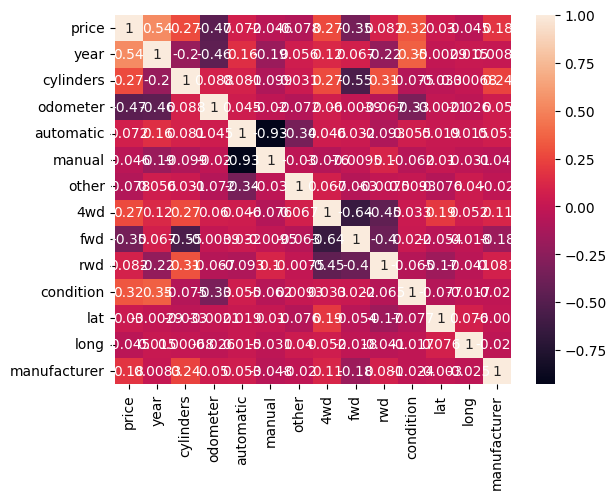

In [53]:
sns.heatmap(teasty.corr(method='spearman'), annot=True)

In [54]:
teasty['model'] = pp_data.groupby('model')['price'].transform('mean')

<Axes: >

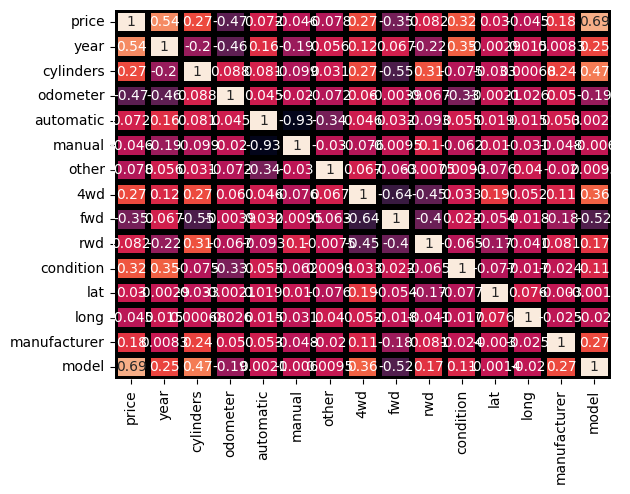

In [55]:
sns.heatmap(teasty.corr(method='spearman'), annot=True, linewidths = 3, cbar = False, linecolor='black')

In [56]:
pp_data['size'].value_counts()

size
full-size      43834
mid-size       23631
compact         9944
sub-compact     1358
Name: count, dtype: int64

In [57]:
teasty['size'] = pp_data['size']

size_mapping = {
    'sub-compact': 0,
    'compact': 1,
    'mid-size': 2,
    'full-size': 3
}


teasty['size'] = teasty['size'].map(size_mapping)

<Axes: >

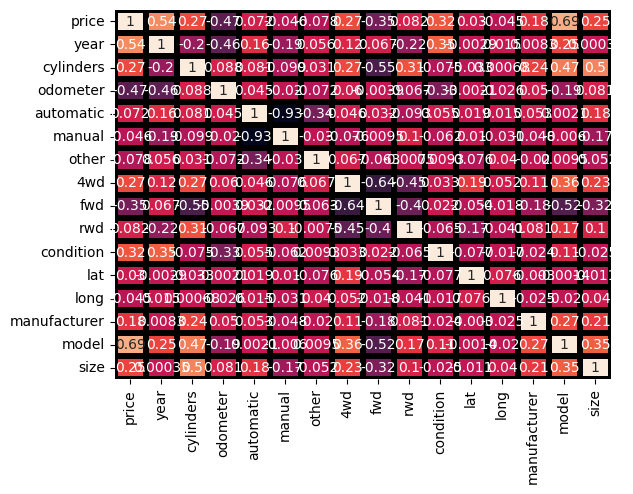

In [58]:
sns.heatmap(lrm_data.corr(method='spearman'), annot=True, linewidths = 3, cbar = False, linecolor='black')

In [59]:
X = teasty.drop(['price'], axis=1)
y = teasty['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [60]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor()

In [61]:
reg.score(X_test, y_test)

0.8620898972979998

In [62]:
# clf = RandomForestClassifier(criterion='gini',
#                             max_depth = 8,
#                             min_samples_split = 10,
#                             random_state = 5)

In [63]:
# clf.fit(X_train, y_train)

In [64]:
# clf.feature_importances_

In [65]:
pp_data

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,size,...,paint_color,state,lat,long,automatic,manual,other,4wd,fwd,rwd
31,15000,2013.0,ford,f-150 xlt,excellent,6,gas,128000.0,clean,full-size,...,black,al,32.592000,-85.518900,1,0,0,0,0,1
55,19900,2004.0,ford,f250 super duty,good,8,diesel,88000.0,clean,full-size,...,blue,al,32.547500,-85.468200,1,0,0,1,0,0
59,14000,2012.0,honda,odyssey,excellent,6,gas,95000.0,clean,full-size,...,silver,al,32.628739,-85.461820,1,0,0,0,1,0
65,22500,2001.0,ford,f450,good,8,diesel,144700.0,clean,full-size,...,white,al,32.630400,-85.401600,0,1,0,0,0,1
73,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8,gas,90000.0,rebuilt,mid-size,...,grey,al,32.822400,-85.770400,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426808,18000,2005.0,chevrolet,silverado 1500 lt 4x4,excellent,8,gas,130000.0,lien,full-size,...,blue,wy,43.452800,-110.739300,1,0,0,1,0,0
426809,18000,1990.0,jeep,gand wagoneer,good,8,gas,114400.0,clean,full-size,...,black,wy,43.452800,-110.739300,1,0,0,1,0,0
426831,9800,1985.0,nissan,300zx coupe with t-tops,like new,6,gas,115000.0,clean,sub-compact,...,red,wy,41.143700,-104.796200,1,0,0,0,0,1
426833,6800,1997.0,jaguar,xk8 convertible,good,8,gas,69550.0,clean,compact,...,white,wy,43.642930,-108.222976,1,0,0,0,0,1


In [66]:
fuel_dummies = pd.get_dummies(pp_data['fuel'], prefix='fuel')

In [67]:
fuel_dummies = fuel_dummies*1

In [68]:
fuel_dummies.dropna(inplace=True)

In [69]:
teasty = pd.concat([teasty, fuel_dummies], axis=1)

In [70]:
teasty.dropna(inplace=True)# = teasty.drop(['fuel_diesel', 'fuel_electric', 'fuel_gas', 'fuel_hybrid', 'fuel_other'], axis=1)

<Axes: >

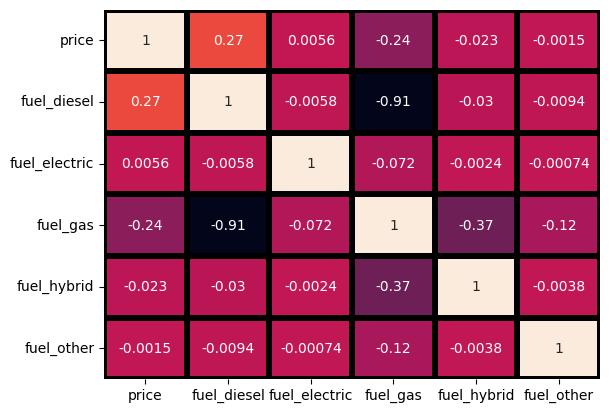

In [71]:
sns.heatmap(pd.concat([teasty['price'], fuel_dummies], axis=1).corr(method='spearman'), annot=True, linewidths = 3, cbar = False, linecolor='black')

In [128]:
X = teasty.drop(['price'], axis=1)
y = teasty['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [134]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor()

In [135]:
reg.score(X_test, y_test)

0.868782348248387

In [75]:
teasty

,price,year,cylinders,odometer,automatic,manual,other,4wd,fwd,rwd,...,lat,long,manufacturer,model,size,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
31,15000.0,2013.0,6,128000.0,1.0,0.0,0.0,0.0,0.0,1.0,...,32.592000,-85.518900,88309.128959,19452.968254,3.0,0,0,1,0,0
55,19900.0,2004.0,8,88000.0,1.0,0.0,0.0,1.0,0.0,0.0,...,32.547500,-85.468200,88309.128959,21005.797619,3.0,1,0,0,0,0
59,14000.0,2012.0,6,95000.0,1.0,0.0,0.0,0.0,1.0,0.0,...,32.628739,-85.461820,8638.033768,8604.824373,3.0,0,0,1,0,0
65,22500.0,2001.0,8,144700.0,0.0,1.0,0.0,0.0,0.0,1.0,...,32.630400,-85.401600,88309.128959,26498.514286,3.0,1,0,0,0,0
73,15000.0,2017.0,8,90000.0,1.0,0.0,0.0,0.0,0.0,1.0,...,32.822400,-85.770400,10592.270335,15000.000000,2.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426793,15999.0,2018.0,4,36465.0,1.0,0.0,0.0,0.0,1.0,0.0,...,41.138284,-104.784799,14753.572941,14199.000000,2.0,0,0,1,0,0
426808,18000.0,2005.0,8,130000.0,1.0,0.0,0.0,1.0,0.0,0.0,...,43.452800,-110.739300,14753.572941,25359.945205,3.0,0,0,1,0,0
426809,18000.0,1990.0,8,114400.0,1.0,0.0,0.0,1.0,0.0,0.0,...,43.452800,-110.739300,13830.674368,18000.000000,3.0,0,0,1,0,0
426831,9800.0,1985.0,6,115000.0,1.0,0.0,0.0,0.0,0.0,1.0,...,41.143700,-104.796200,43631.107813,7242.714286,0.0,0,0,1,0,0


In [76]:
pp_data.model.value_counts()

model
f-150                      1635
silverado 1500             1434
1500                        881
camry                       681
silverado                   649
                           ... 
2500hd duramax 4x4 crew       1
mustang gt 5.0l v8            1
integra se                    1
wrangler rubicon 4d           1
gand wagoneer                 1
Name: count, Length: 9459, dtype: int64

## Normalization

In [77]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
scaler = MinMaxScaler()

In [79]:
teasty.columns

Index(['price', 'year', 'cylinders', 'odometer', 'automatic', 'manual',
       'other', '4wd', 'fwd', 'rwd', 'condition', 'lat', 'long',
       'manufacturer', 'model', 'size', 'fuel_diesel', 'fuel_electric',
       'fuel_gas', 'fuel_hybrid', 'fuel_other'],
      dtype='object')

In [133]:
teasty[['manufacturer', 'model']]

,manufacturer,model
31,0.152979,0.000367
55,0.152979,0.000397
59,0.005891,0.000162
65,0.152979,0.000500
73,0.009499,0.000283
...,...,...
426793,0.017181,0.000268
426808,0.017181,0.000479
426809,0.015477,0.000340
426831,0.070494,0.000137


In [81]:
teasty[['manufacturer', 'model']] = scaler.fit_transform(teasty[['manufacturer', 'model']])

In [82]:
teasty[['manufacturer', 'model']]

,manufacturer,model
31,0.152979,0.000367
55,0.152979,0.000397
59,0.005891,0.000162
65,0.152979,0.000500
73,0.009499,0.000283
...,...,...
426793,0.017181,0.000268
426808,0.017181,0.000479
426809,0.015477,0.000340
426831,0.070494,0.000137


In [83]:
X = teasty.drop(['price'], axis=1)
y = teasty['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [84]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor()

In [85]:
reg.score(X_test, y_test)

0.8760804265941532

**Normalizing output**

In [86]:
norm_test = teasty.copy()

In [87]:
norm_test[['price']] = scaler.fit_transform(norm_test[['price']])

In [88]:
X = norm_test.drop(['price'], axis=1)
y = norm_test['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [89]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor()

In [90]:
reg.score(X_test, y_test)

0.8855331643731318

In [91]:
from sklearn.metrics import mean_squared_error

y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

In [92]:
mse

0.00044949132780227827

## Hyperparameter Tuning

In [93]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [94]:
param_dist = {
    'n_estimators': randint(80, 200),
    'max_features': [0.3, 0.4, 0.5, 0.6],
    'max_depth': randint(1, 60),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 5)
}


In [95]:
reg_random = RandomizedSearchCV(
    reg, param_distributions=param_dist, n_iter=5, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs= -1
)

In [96]:
X = teasty.drop(['price'], axis=1)
y = teasty['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [97]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor()

In [98]:
reg_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x33412a610>,
                                        'max_features': [0.3, 0.4, 0.5, 0.6],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x33412aee0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x33412c0d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x3341235e0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [99]:
reg_random.best_params_

{'max_depth': 24,
 'max_features': 0.5,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 167}

In [100]:
best_estimator = reg_random.best_estimator_

y_pred = best_estimator.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

In [101]:
mse

19357729.002439145

In [102]:
y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

In [103]:
mse

19454062.472488083

In [104]:
reg.score(X_test, y_test)

0.8781397377439181

## Neural Network

In [105]:
# !pip install tensorflow
# !pip install tensorflow==2.15.0
# !pip install adapt==0.4.4

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers.legacy import Adam, SGD
from scikeras.wrappers import KerasRegressor 
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import make_scorer

In [107]:
teasty.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75313 entries, 31 to 426833
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          75313 non-null  float64
 1   year           75313 non-null  float64
 2   cylinders      75313 non-null  Int64  
 3   odometer       75313 non-null  float64
 4   automatic      75313 non-null  float64
 5   manual         75313 non-null  float64
 6   other          75313 non-null  float64
 7   4wd            75313 non-null  float64
 8   fwd            75313 non-null  float64
 9   rwd            75313 non-null  float64
 10  condition      75313 non-null  float64
 11  lat            75313 non-null  float64
 12  long           75313 non-null  float64
 13  manufacturer   75313 non-null  float64
 14  model          75313 non-null  float64
 15  size           75313 non-null  float64
 16  fuel_diesel    75313 non-null  int64  
 17  fuel_electric  75313 non-null  int64  
 18  fuel_gas 

In [108]:
def create_model():
    model = Sequential()

    model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=16, activation='relu'))
    
    model.add(Dense(units=1, activation='linear'))
    
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')
    return model

In [109]:
X = teasty.drop(['price'], axis=1)
y = teasty['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [110]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [111]:
# New
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [112]:
model = create_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_test, y_test))

2024-01-01 20:39:18.108050: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-01-01 20:39:18.108077: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-01-01 20:39:18.108086: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-01-01 20:39:18.108518: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-01 20:39:18.108879: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2024-01-01 20:39:18.700687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


7532/7532 [==============================] - 66s 9ms/step - loss: 170179088.0000 - val_loss: 123755472.0000
Epoch 2/10
7532/7532 [==============================] - 59s 8ms/step - loss: 117847304.0000 - val_loss: 110863272.0000
Epoch 3/10
7532/7532 [==============================] - 171s 23ms/step - loss: 108475520.0000 - val_loss: 103455184.0000
Epoch 4/10
7532/7532 [==============================] - 63s 8ms/step - loss: 101827992.0000 - val_loss: 96651296.0000
Epoch 5/10
7532/7532 [==============================] - 65s 9ms/step - loss: 95868264.0000 - val_loss: 90934776.0000
Epoch 6/10
7532/7532 [==============================] - 65s 9ms/step - loss: 91984504.0000 - val_loss: 87744096.0000
Epoch 7/10
7532/7532 [==============================] - 69s 9ms/step - loss: 91125008.0000 - val_loss: 87846080.0000
Epoch 8/10
7532/7532 [==============================] - 63s 8ms/step - loss: 92631072.0000 - val_loss: 87226648.0000
Epoch 9/10
7532/7532 [==============================] - 70s 9ms/st

In [115]:
results.append(model.evaluate(X_test, y_test))

471/471 [==============================] - 2s 4ms/step - loss: 89647856.0000


In [114]:
results = []

In [116]:
results

[89647856.0]

### Hyperparameter Tuning (again for nn)

In [ ]:
keras_regressor = KerasRegressor(model=create_model, epochs=10, batch_size=16, verbose=1)

keras_regressor.get_params().keys()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'optimizer__learning_rate': [0.00001, 0.000001, 0.0000001],
    'batch_size': [2,4,8]
}

grid_search = GridSearchCV(estimator=keras_regressor, param_grid=param_grid, cv=2, scoring='neg_mean_squared_error')

#random_search = RandomizedSearchCV(estimator=keras_regressor, param_distributions=param_dist, scoring='neg_mean_squared_error', cv=3)


In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_
#grid_search.best_score_
#grid_search.best_estimator_
#grid_search.cv_results_

List of MSE
- RandomForestRegressor : 20.765.631
- RandomForestRegressor with tuned hyperparameters : 20.366.637
- NN Model1 : 82.025.256
- NN Model2 : 41.265.432 (More layers, normalized data)
- NN Model3 : 46.571.828 (With dropout, small learning rate)
- NN Model4 : 43.435.404 (Only without dropout)

NN Hyperparameter Tuning
- {'optimizer__learning_rate': 0.1, 'epochs': 40, 'batch_size': 16}
- 43.210.180

2
- {'optimizer__learning_rate': 1, 'epochs': 60, 'batch_size': 16}
- 42.512.004

3
- {'optimizer__learning_rate': 2, 'epochs': 100}
-

## Feature

<Axes: >

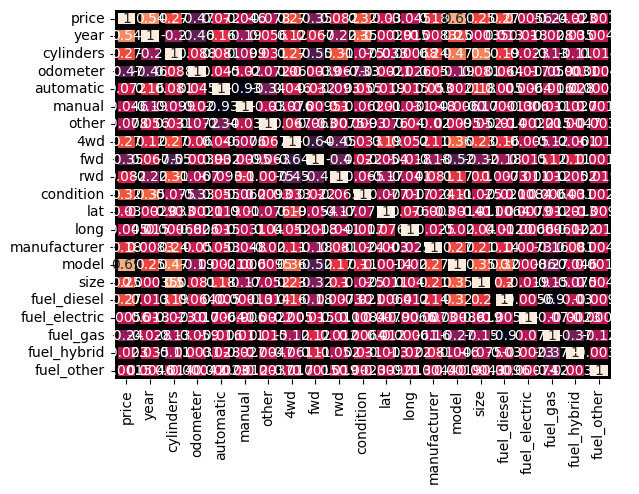

In [136]:
sns.heatmap(teasty.corr(method='spearman'), annot=True, linewidths = 3, cbar = False, linecolor='black')

In [140]:
abs(teasty.corr(method='spearman')["price"])

price            1.000000
year             0.536973
cylinders        0.273624
odometer         0.469972
automatic        0.071927
manual           0.045774
other            0.077817
4wd              0.274784
fwd              0.353219
rwd              0.081654
condition        0.320369
lat              0.030255
long             0.045238
manufacturer     0.181217
model            0.692079
size             0.251922
fuel_diesel      0.271811
fuel_electric    0.005551
fuel_gas         0.240594
fuel_hybrid      0.022691
fuel_other       0.001487
Name: price, dtype: float64

In [141]:
reg = RandomForestRegressor()

In [147]:
vals = [0,0.1,0.2,0.3,0.4,0.5,0.6]
y = teasty['price']
for val in vals:
    features = abs(teasty.corr(method='spearman')["price"][abs(teasty.corr(method='spearman')["price"])>val].drop('price')).index.tolist()
    
    X = teasty.drop(columns='price')
    X = X[features]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    print(features)

    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    print(f'MSE: {mse}')


['year', 'cylinders', 'odometer', 'automatic', 'manual', 'other', '4wd', 'fwd', 'rwd', 'condition', 'lat', 'long', 'manufacturer', 'model', 'size', 'fuel_diesel', 'fuel_electric', 'fuel_gas', 'fuel_hybrid', 'fuel_other']
MSE: 19395945.449295063
['year', 'cylinders', 'odometer', '4wd', 'fwd', 'condition', 'manufacturer', 'model', 'size', 'fuel_diesel', 'fuel_gas']
MSE: 21319392.78849072
['year', 'cylinders', 'odometer', '4wd', 'fwd', 'condition', 'model', 'size', 'fuel_diesel', 'fuel_gas']
MSE: 21507602.36155471
['year', 'odometer', 'fwd', 'condition', 'model']
MSE: 26911300.640614115
['year', 'odometer', 'model']
MSE: 28179263.497647617
['year', 'model']
MSE: 37413390.48012597
['model']
MSE: 76911879.27038732


In [150]:
vals = [0.01,0.03,0.04,0.07]
y = teasty['price']
for val in vals:
    features = abs(teasty.corr(method='spearman')["price"][abs(teasty.corr(method='spearman')["price"])>val].drop('price')).index.tolist()
    
    X = teasty.drop(columns='price')
    X = X[features]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    print(features)

    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    print(f'MSE: {mse}')


['year', 'cylinders', 'odometer', 'automatic', 'manual', 'other', '4wd', 'fwd', 'rwd', 'condition', 'lat', 'long', 'manufacturer', 'model', 'size', 'fuel_diesel', 'fuel_gas', 'fuel_hybrid']
MSE: 20703477.2186184
['year', 'cylinders', 'odometer', 'automatic', 'manual', 'other', '4wd', 'fwd', 'rwd', 'condition', 'lat', 'long', 'manufacturer', 'model', 'size', 'fuel_diesel', 'fuel_gas']
MSE: 17663756.456727132
['year', 'cylinders', 'odometer', 'automatic', 'manual', 'other', '4wd', 'fwd', 'rwd', 'condition', 'long', 'manufacturer', 'model', 'size', 'fuel_diesel', 'fuel_gas']
MSE: 19685040.070191644
['year', 'cylinders', 'odometer', 'automatic', 'other', '4wd', 'fwd', 'rwd', 'condition', 'manufacturer', 'model', 'size', 'fuel_diesel', 'fuel_gas']
MSE: 21736457.902233608


In [167]:
features = abs(teasty.corr(method='spearman')["price"][abs(teasty.corr(method='spearman')["price"])>0.03].drop('price')).index.tolist()
    
X = teasty.drop(columns='price')
X = X[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.8832752918619078

In [171]:
reg_random.best_params_

{'max_depth': 24,
 'max_features': 0.5,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 167}

In [180]:
reg = RandomForestRegressor(max_depth= 24,
 max_features= 0.5,
 min_samples_leaf=2,
 min_samples_split= 3,
 n_estimators= 167)

In [177]:
features = abs(teasty.corr(method='spearman')["price"][abs(teasty.corr(method='spearman')["price"])>0.03].drop('price')).index.tolist()
    
X = teasty.drop(columns='price')
X = X[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.8655129866911464

In [178]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold


In [181]:
features = abs(teasty.corr(method='spearman')["price"][abs(teasty.corr(method='spearman')["price"])>0.03].drop('price')).index.tolist()

X = teasty[features]
y = teasty['price']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

y_pred = cross_val_predict(reg, X, y, cv=kf)

In [182]:
mse = mean_squared_error(y, y_pred)

In [183]:
mse

19767469.203317195

In [184]:
X = teasty.drop(columns='price')
y = teasty['price']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

y_pred = cross_val_predict(reg, X, y, cv=kf)
mse = mean_squared_error(y, y_pred)
mse

19659887.059100516

In [185]:
vals = [0,0.01,0.03,0.04,0.07,0.1,0.2,0.3,0.4,0.5,0.6]

y = teasty['price']

reg = RandomForestRegressor(max_depth= 24,
 max_features= 0.5,
 min_samples_leaf=2,
 min_samples_split= 3,
 n_estimators= 167)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for val in vals:
    
    features = abs(teasty.corr(method='spearman')["price"][abs(teasty.corr(method='spearman')["price"])>val].drop('price')).index.tolist()
    
    X = teasty.drop(columns='price')
    X = X[features]
    
    print(features)

    y_pred = cross_val_predict(reg, X, y, cv=kf)
    mse = mean_squared_error(y, y_pred)
    
    print(f'MSE: {mse}')


['year', 'cylinders', 'odometer', 'automatic', 'manual', 'other', '4wd', 'fwd', 'rwd', 'condition', 'lat', 'long', 'manufacturer', 'model', 'size', 'fuel_diesel', 'fuel_electric', 'fuel_gas', 'fuel_hybrid', 'fuel_other']
MSE: 19709591.092838164
['year', 'cylinders', 'odometer', 'automatic', 'manual', 'other', '4wd', 'fwd', 'rwd', 'condition', 'lat', 'long', 'manufacturer', 'model', 'size', 'fuel_diesel', 'fuel_gas', 'fuel_hybrid']
MSE: 19677985.88091353
['year', 'cylinders', 'odometer', 'automatic', 'manual', 'other', '4wd', 'fwd', 'rwd', 'condition', 'lat', 'long', 'manufacturer', 'model', 'size', 'fuel_diesel', 'fuel_gas']
MSE: 19719753.027792785
['year', 'cylinders', 'odometer', 'automatic', 'manual', 'other', '4wd', 'fwd', 'rwd', 'condition', 'long', 'manufacturer', 'model', 'size', 'fuel_diesel', 'fuel_gas']
MSE: 19982232.195044067
['year', 'cylinders', 'odometer', 'automatic', 'other', '4wd', 'fwd', 'rwd', 'condition', 'manufacturer', 'model', 'size', 'fuel_diesel', 'fuel_gas']
M